In [1]:
import proteosim as ps
print(ps.__file__)


/Users/lauras/Documents/GitHub/proteosim/proteosim/__init__.py


## 1. FASTA input
- Input: `data/sample_proteins.fasta` can be adapted

In [2]:
proteins = ps.read_fasta("data/sample_proteins.fasta")
len(proteins)

3

## 2. Protein digestion
- Choose protease (manually or if saved within module call `enzyme_cleavage_patterns`).

In [3]:
peptides = ps.digest_protein_collection(proteins, ps.enzyme_cleavage_patterns['Trypsin'])
print(peptides)

{'P11802': ['MATSR', 'YEPVAEIGVGAYGTVYK', 'DPHSGHFVALK', 'VPNGGGGGGGLPISTVR', 'EVALLR', 'LEAFEHPNVVR', 'LMDVCATSR', 'VTLVFEHVDQDLR', 'TYLDK', 'APPPGLPAETIK', 'GLDFLHANCIVHR', 'DLKPENILVTSGGTVK', 'LADFGLAR', 'IYSYQMALTPVVVTLWYR', 'APEVLLQSTYATPVDMWSVGCIFAEMFR', 'KPLFCGNSEADQLGK', 'IFDLIGLPPEDDWPR', 'DVSLPR', 'GAFPPR', 'GPRPVQSVVPEMEESGAQLLLEMLTFNPHK', 'ISAFR', 'ALQHSYLHK', 'DEGNPE'], 'A0A087WTH1': ['MEDEEK', 'AVEILGNTEAAHPPSPIR', 'CCWLR', 'CLAATSIICGCSCLGVMALVFAIK', 'SEEAVR'], 'A0A087WTH5': ['MVIEWERPR', 'MILSNTTAVTPFLTK', 'LWQETVQQGGNMSGLAR', 'SGDGK', 'LEALYVLMVLGFFGFFTLGIMLSYIR', 'LEHSNDPFNVYIESNAWQEK', 'AYVQAR', 'VLESYR', 'SCYVVENHLAIEQPNTHLPETKPSP']}


### 2.2 Per protein coverage

In [4]:
for prot, peps in peptides.items():

    coverage = ps.compute_sequence_coverage(
        protein_seq=proteins[prot],
        peptides=peps,
        )

    print(f'{prot}: {coverage}')

P11802: 92.73927392739274
A0A087WTH1: 50.86206896551724
A0A087WTH5: 93.47826086956522


## 3. Liquid chromatography simulation
- Pool peptides and predict retention times.
- Plot histogram via `ps.plot_retention_time`.
- Select retention window with `ps.select_retention_time_window`.

### 3.1 predict retention times

In [5]:
all_peptides = [pep for sublist in peptides.values() for pep in sublist] #values from peptide values are extracted as separate lists
retention_times = ps.predict_lc_retention_times(all_peptides)

print(retention_times)

{'MATSR': 8.9, 'YEPVAEIGVGAYGTVYK': 42.7, 'DPHSGHFVALK': 29.0, 'VPNGGGGGGGLPISTVR': 31.6, 'EVALLR': 25.5, 'LEAFEHPNVVR': 33.5, 'LMDVCATSR': 23.6, 'VTLVFEHVDQDLR': 41.0, 'TYLDK': 11.1, 'APPPGLPAETIK': 29.1, 'GLDFLHANCIVHR': 47.5, 'DLKPENILVTSGGTVK': 34.5, 'LADFGLAR': 29.5, 'IYSYQMALTPVVVTLWYR': 78.1, 'APEVLLQSTYATPVDMWSVGCIFAEMFR': 96.2, 'KPLFCGNSEADQLGK': 28.0, 'IFDLIGLPPEDDWPR': 51.3, 'DVSLPR': 14.7, 'GAFPPR': 16.3, 'GPRPVQSVVPEMEESGAQLLLEMLTFNPHK': 80.9, 'ISAFR': 19.9, 'ALQHSYLHK': 28.5, 'DEGNPE': -4.0, 'MEDEEK': -0.7, 'AVEILGNTEAAHPPSPIR': 43.8, 'CCWLR': 24.6, 'CLAATSIICGCSCLGVMALVFAIK': 96.2, 'SEEAVR': 5.7, 'MVIEWERPR': 30.9, 'MILSNTTAVTPFLTK': 51.1, 'LWQETVQQGGNMSGLAR': 39.4, 'SGDGK': -3.7, 'LEALYVLMVLGFFGFFTLGIMLSYIR': 140.2, 'LEHSNDPFNVYIESNAWQEK': 42.6, 'AYVQAR': 15.6, 'VLESYR': 18.4, 'SCYVVENHLAIEQPNTHLPETKPSP': 54.2}


### 3.2 plot simulated LC

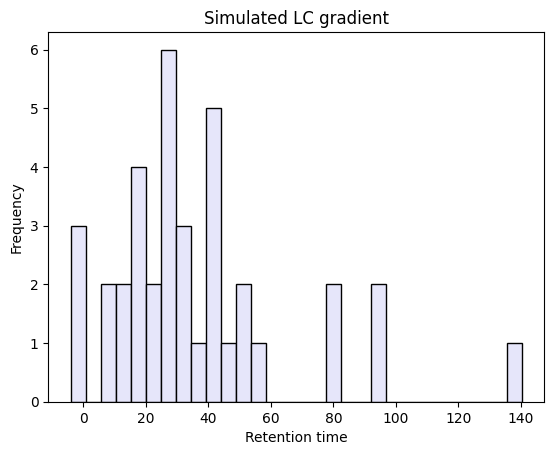

In [6]:
LC_plot = ps.plot_retention_time(retention_times)

### 3.3 select peptides within retention time window

In [7]:
retention_time_window = ps.select_retention_time_window(retention_times, 0, 20)
print(retention_time_window)

{'MATSR': 8.9, 'TYLDK': 11.1, 'DVSLPR': 14.7, 'GAFPPR': 16.3, 'ISAFR': 19.9, 'SEEAVR': 5.7, 'AYVQAR': 15.6, 'VLESYR': 18.4}


## 4. MS1 simulation
- Masses: `ps.calculate_mol_mass_collection`.
- m/z: `ps.calculate_mz_collection` with charge=2.
- Plot: `ps.plot_ms1`.

### 4.1 calculate molecular masses of peptides

In [8]:
amino_acid_mass_dalton = {
    'A': 71.08, 'R': 156.19, 'N': 114.10, 'D': 115.09,
    'C': 103.15, 'E': 129.12, 'Q': 128.13, 'G': 57.05,
    'H': 137.14, 'I': 113.16, 'L': 113.16, 'K': 128.17,
    'M': 131.19, 'F': 147.18, 'P': 97.12, 'S': 87.08,
    'T': 101.11, 'W': 186.21, 'Y': 163.18, 'V': 99.13,
}

In [9]:
mol_masses_ms1 = ps.calculate_mol_mass_collection(retention_time_window, amino_acid_mass_dalton)
print(mol_masses_ms1)

{'MATSR': 546.65, 'TYLDK': 620.71, 'DVSLPR': 667.77, 'GAFPPR': 625.74, 'ISAFR': 574.69, 'SEEAVR': 671.72, 'AYVQAR': 688.79, 'VLESYR': 747.8599999999999}


### 4.2 calculate mass to charge ratio for peptides

In [10]:
mz_ms1 = ps.calculate_mz_collection(mol_masses_ms1)
print(mz_ms1)

{'MATSR': 274.332, 'TYLDK': 311.362, 'DVSLPR': 334.892, 'GAFPPR': 313.877, 'ISAFR': 288.35200000000003, 'SEEAVR': 336.867, 'AYVQAR': 345.402, 'VLESYR': 374.93699999999995}


### 4.3 plot simulated MS1 spectrum

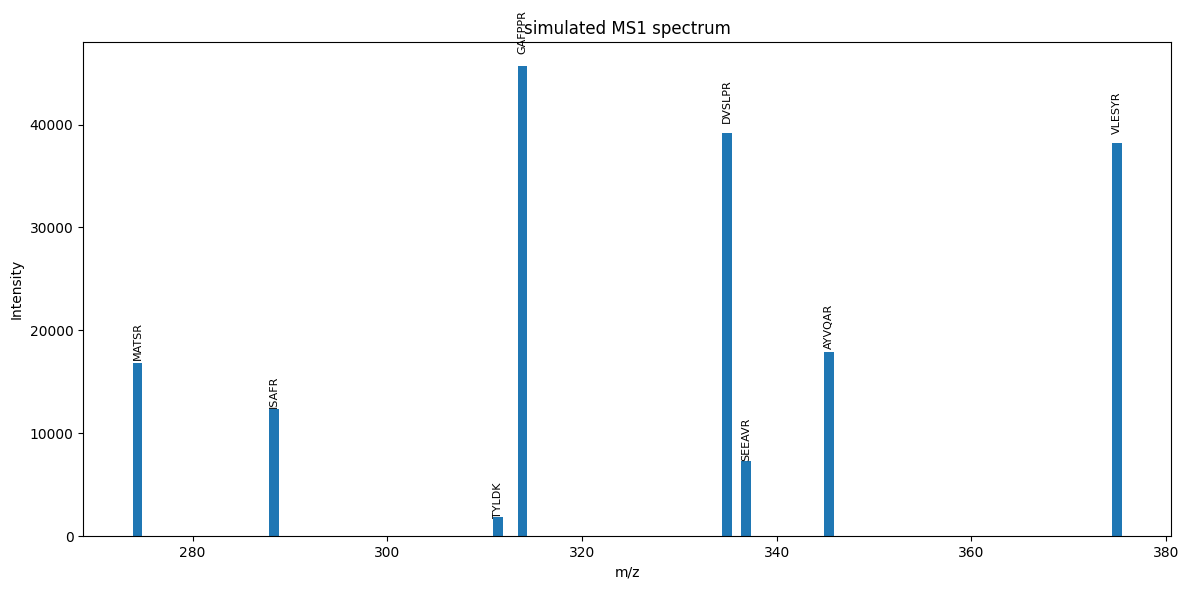

In [11]:
plot_ms1 = ps.plot_ms1(mz_ms1, title ='simulated MS1 spectrum')

## 5. MS2 simulation
- Choose peptide `MATSR`).
- Fragments: `ps.fragment_peptide`.
- Masses/m/z with charge=1.
- Plot reused MS1 helper.

### 5.1 simulated fragmentation 
- for peptide 'MATSR'

In [12]:
#sequence coverage wird exemplarisch für das erste protein des dictionary peptides berechnet
first_key = next(iter(retention_time_window))

fragments = ps.fragment_peptide(first_key)
print(fragments)

{'MATSR': ['M', 'MA', 'MAT', 'MATS', 'MATSR', 'R', 'SR', 'TSR', 'ATSR', 'MATSR']}


### 5.2 calculate molecular mass of fragments

In [13]:
mol_masses_ms2 = ps.calculate_mol_mass_collection(fragments[first_key], amino_acid_mass_dalton)
print(mol_masses_ms2)

{'M': 131.19, 'MA': 202.26999999999998, 'MAT': 303.38, 'MATS': 390.46, 'MATSR': 546.65, 'R': 156.19, 'SR': 243.26999999999998, 'TSR': 344.38, 'ATSR': 415.46}


### 5.3 calculate mass to charge ratio for fragments

In [14]:
mz_ms2 = ps.calculate_mz_collection(mol_masses_ms2, charge = 1)
print(mz_ms2)

{'M': 132.197, 'MA': 203.277, 'MAT': 304.387, 'MATS': 391.467, 'MATSR': 547.6569999999999, 'R': 157.197, 'SR': 244.277, 'TSR': 345.387, 'ATSR': 416.467}


### 5.4 plot simulated MS2 spectrum

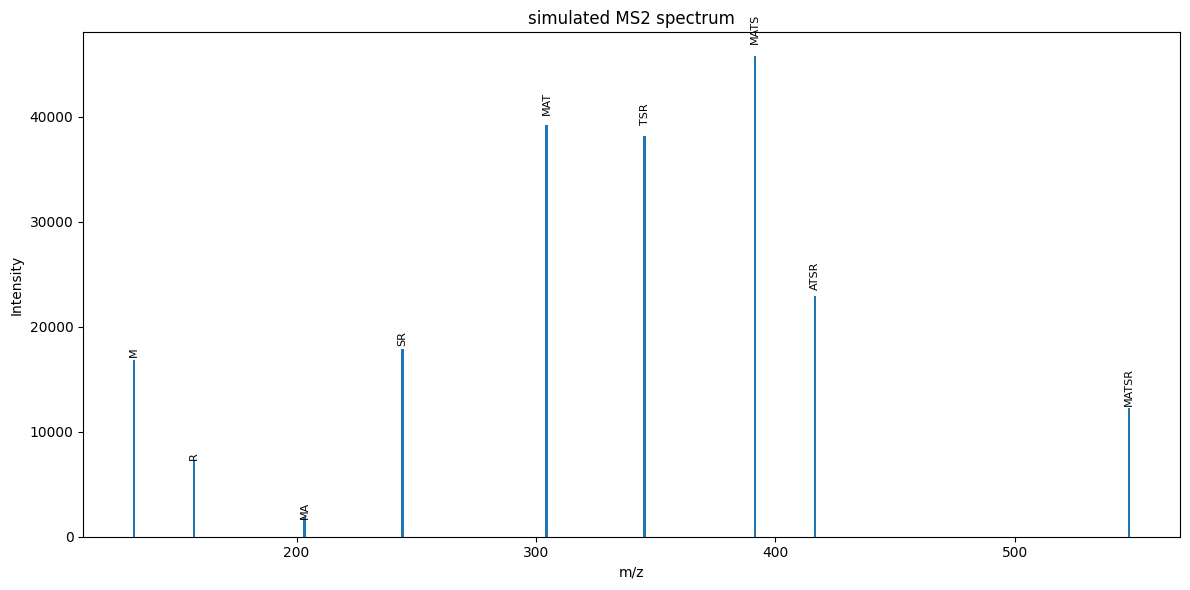

In [15]:
plot_ms2 = ps.plot_ms1(mz_ms2, title = 'simulated MS2 spectrum')

## 6. Export results
- Save MS1 TSV.
- Save MS2 TSV.

In [16]:
import pandas as pd
ms1_df = pd.DataFrame({'peptide': list(mz_ms1.keys()), 'mz': list(mz_ms1.values())})
ms1_df.to_csv('results/ms1_peptide_mzs.tsv', sep='	', index=False)

ms2_df = pd.DataFrame({'fragment': list(mz_ms2.keys()), 'mz': list(mz_ms2.values())})
ms2_df.to_csv('results/ms2_MATSR_fragment_mzs.tsv', sep='	', index=False)